<a href="https://colab.research.google.com/github/nhuttran1356/data_science/blob/main/test_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:

import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [60]:
#Load data from folder
train_data = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) 
train_set = train_data.flow_from_directory('/content/drive/MyDrive/data_tien/train',target_size = (150,150),batch_size = 12, class_mode = 'categorical')

test_data = ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory('/content/drive/MyDrive/data_tien/test',target_size = (150,150),batch_size = 12, class_mode = 'categorical')

Found 108 images belonging to 9 classes.
Found 27 images belonging to 9 classes.


In [61]:
#labels
classes = ['1k','2k','5k','10k','20k','50k','100k','200k','500k']


In [106]:
#build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(9, activation='softmax'))


In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_28 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [108]:
#train model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("Training model")
history = model.fit(x = train_set, validation_data = test_set, epochs = 50, batch_size =64, verbose = 1)


Training model
Epoch 1/50
9/9 [==============================] - 4s 213ms/step - loss: 4.4024 - accuracy: 0.1389 - val_loss: 2.2515 - val_accuracy: 0.1111
Epoch 2/50
9/9 [==============================] - 1s 152ms/step - loss: 2.2071 - accuracy: 0.1296 - val_loss: 2.1458 - val_accuracy: 0.2222
Epoch 3/50
9/9 [==============================] - 1s 152ms/step - loss: 1.9707 - accuracy: 0.2963 - val_loss: 2.0457 - val_accuracy: 0.2593
Epoch 4/50
9/9 [==============================] - 1s 150ms/step - loss: 1.8326 - accuracy: 0.3241 - val_loss: 1.3599 - val_accuracy: 0.4444
Epoch 5/50
9/9 [==============================] - 1s 151ms/step - loss: 1.0502 - accuracy: 0.6389 - val_loss: 0.6890 - val_accuracy: 0.7037
Epoch 6/50
9/9 [==============================] - 1s 157ms/step - loss: 0.8449 - accuracy: 0.7407 - val_loss: 2.3211 - val_accuracy: 0.4074
Epoch 7/50
9/9 [==============================] - 1s 152ms/step - loss: 1.2513 - accuracy: 0.6852 - val_loss: 0.5546 - val_accuracy: 0.8148
Epoch

In [109]:
#save model after training
model.save('final_tien.h5')

In [110]:
#load model 
from keras.models import load_model
model5 =load_model('/content/drive/MyDrive/data_tien/final_tien.h5')

[4]
20k


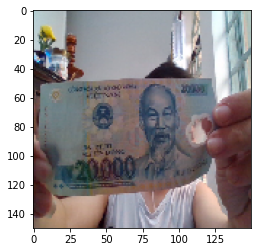

In [116]:
#Testing
from keras.preprocessing.image import load_img,img_to_array
from keras_preprocessing import image
classes = ['1k','2k','5k','10k','20k','50k','100k','200k','500k']
test_image = image.load_img('/content/drive/MyDrive/data_tien/test/20k/70.png', target_size=(150, 150))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model5.predict(test_image)
result1 = np.argmax(result,axis = 1)
print(result1)
result1 = result[0]
for y in range(9):
    if result1[y] == 1.:
        break
prediction = classes[y]
print(prediction)
